In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import CustomClass
from func_file import train_model, test_model, collate_fn

데이터 출처<hr>
- https://www.kaggle.com/datasets/backalla/words-mnist
- https://tc11.cvc.uab.es/datasets/
- https://www.kaggle.com/datasets/hnthnt/jp-font-image-dataset-02?select=00000083.jpg
- https://www.kaggle.com/datasets/ngkinwang/iam-dataset
- https://www.kaggle.com/datasets/ravi02516/20-ocr-dataset
- https://www.kaggle.com/datasets/frlemarchand/synthetic-kmnist-pages?select=synthetic_kmnist_pages.csv

In [2]:
train_data_path = './data/archive (3)/new_test/new_train'
test_data_path = './data/archive (3)/new_test/new_test'

In [3]:
transformer = v2.Compose(transforms=
                                 [transforms.ToTensor(),
                                  v2.Resize(size=[64,128])
                                  ])

In [4]:
train_name_list = os.listdir(train_data_path)
test_name_list = os.listdir(test_data_path)

In [5]:
train_img_list = []
test_img_list = []
train_label = []
test_label = []

In [6]:
for img_name in train_name_list[:15000]:
    img = Image.open(train_data_path+'/'+img_name)
    train_img_list.append(transformer(img).numpy())
    train_label.append(img_name.split('.jpg')[0])
    img.close()

for img_name in test_name_list[:3000]:
    img = Image.open(test_data_path+'/'+img_name)
    test_img_list.append(transformer(img).numpy())
    test_label.append(img_name.split('.jpg')[0])
    img.close()

In [7]:
# train_img_list[0]

In [8]:
trainTS = torch.tensor(train_img_list)
testTS = torch.tensor(test_img_list)

C:\Users\낙지들의왕\AppData\Local\Temp\ipykernel_24292\278347032.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  trainTS = torch.tensor(train_img_list)


In [9]:
trainTS.shape, testTS.shape

(torch.Size([15000, 3, 64, 128]), torch.Size([1472, 3, 64, 128]))

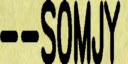

In [10]:
tf = transforms.ToPILImage()
sample = tf(trainTS[12])
sample

In [11]:
eng_only_vocab = CustomClass.Vocab()
eng_only_vocab.resetCode()

In [12]:
trainDS = CustomClass.CustomDataset(trainTS, np.array(train_label), eng_only_vocab)
testDS1 = CustomClass.CustomDataset(testTS, np.array(test_label), eng_only_vocab)

In [13]:
check_id = 1200
trainDS[check_id][1], train_label[check_id], len(trainDS[check_id][1]), len(test_label[check_id])

(array([15, 15, 87, 94, 75, 34, 59, 37, 14, 38, 80, 42, 76, 83, 65, 76]),
 '..18Pazd-eUiQXFQ',
 16,
 15)

In [14]:
torch.random.manual_seed(100)
gen = torch.Generator().manual_seed(100)

In [15]:
trainDS1, validDS1 = random_split(trainDS, [0.9, 0.1], generator=gen)

In [16]:
torch.cuda.is_available()

True

In [17]:
for d in trainDS1:
    print(d[1].shape)

(17,)
(7,)
(11,)
(10,)
(16,)
(11,)
(16,)
(12,)
(19,)
(12,)
(17,)
(15,)
(6,)
(17,)
(10,)
(11,)
(8,)
(9,)
(9,)
(12,)
(5,)
(6,)
(7,)
(7,)
(5,)
(11,)
(12,)
(10,)
(19,)
(14,)
(14,)
(18,)
(8,)
(8,)
(18,)
(9,)
(10,)
(8,)
(6,)
(11,)
(14,)
(11,)
(7,)
(6,)
(17,)
(9,)
(18,)
(8,)
(7,)
(17,)
(8,)
(8,)
(9,)
(15,)
(12,)
(16,)
(19,)
(9,)
(12,)
(5,)
(11,)
(10,)
(17,)
(7,)
(5,)
(15,)
(6,)
(9,)
(11,)
(13,)
(17,)
(6,)
(10,)
(9,)
(9,)
(6,)
(18,)
(13,)
(19,)
(14,)
(9,)
(5,)
(4,)
(15,)
(13,)
(12,)
(6,)
(7,)
(11,)
(13,)
(15,)
(15,)
(19,)
(10,)
(11,)
(7,)
(9,)
(10,)
(6,)
(5,)
(8,)
(12,)
(8,)
(15,)
(8,)
(19,)
(18,)
(10,)
(16,)
(15,)
(16,)
(12,)
(13,)
(10,)
(12,)
(18,)
(7,)
(19,)
(14,)
(8,)
(11,)
(17,)
(12,)
(13,)
(8,)
(9,)
(19,)
(5,)
(13,)
(17,)
(16,)
(11,)
(14,)
(11,)
(13,)
(7,)
(14,)
(18,)
(11,)
(5,)
(5,)
(6,)
(16,)
(10,)
(12,)
(5,)
(6,)
(14,)
(14,)
(7,)
(12,)
(8,)
(10,)
(9,)
(9,)
(11,)
(8,)
(9,)
(7,)
(13,)
(10,)
(19,)
(6,)
(17,)
(10,)
(15,)
(7,)
(11,)
(6,)
(15,)
(18,)
(14,)
(9,)
(16,)
(13,)
(15,)
(10,)
(8,)


In [18]:
# trainDS1[0], trainDS1[0][0].shape, trainDS1[0][1].shape

In [19]:
BATCH_SIZE = 100
trainDL1 = DataLoader(trainDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
validDL1 = DataLoader(validDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
testDL1 = DataLoader(testDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn, drop_last=True)

In [29]:
# len(trainDL1)

In [30]:
# for f, t in trainDL1:
#     print(f.shape, t.shape)
#     print(f.dtype, t.dtype)
#     print(f)
#     print(t)
#     break

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomClass.CustomModel(3, len(eng_only_vocab)).to(device)
optim = torch.optim.Adam(model.parameters())
schd = torch.optim.lr_scheduler.ReduceLROnPlateau(optim)

In [32]:
model

CustomModel(
  (CNN): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(

In [ ]:
result = train_model(model, optim, trainDL1, validDL1, device, schd=schd)

In [ ]:
torch.save(model, './best_model100.pkl')

In [21]:
testModel1 = torch.load('./best_model100.pkl')
# testModel2 = torch.load('./best_model100.pkl')

In [ ]:
train_costs = [res.cpu().item() for res in result[0]]
valid_costs = [res.cpu().item() for res in result[1]]

plt.plot(train_costs)
plt.plot(valid_costs)
plt.legend(['train', 'valid'])
plt.grid(alpha=0.35)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [22]:
test_result = test_model(testModel1, testDL1, device)

Proceeding....Trial   0 --- 
test cost = 2.458014965057373
Trial   1 --- 
test cost = 2.339124917984009
Trial   2 --- 
test cost = 2.3110830783843994
Trial   3 --- 
test cost = 2.16355562210083
Trial   4 --- 
test cost = 2.430647134780884
Trial   5 --- 
test cost = 2.451616048812866
Trial   6 --- 
test cost = 2.3012657165527344
Trial   7 --- 
test cost = 2.2557950019836426
Trial   8 --- 
test cost = 2.5637118816375732
Trial   9 --- 
test cost = 2.3399550914764404
.Trial  10 --- 
test cost = 2.3101823329925537
Trial  11 --- 
test cost = 2.3720550537109375
Trial  12 --- 
test cost = 2.277987003326416
Trial  13 --- 
test cost = 2.1621816158294678


In [23]:
sum(test_result) / len(test_result)

2.338369676045009

In [35]:
check_id = 324

imgTS = torch.FloatTensor(test_img_list[check_id]).unsqueeze(dim=0).to(device)

testModel1.eval()

pre1 = testModel1(imgTS)

print(torch.argmax(pre1, dim=-1)[0])

for id in torch.argmax(pre1, dim=-1)[0]:
    letter = eng_only_vocab.decoder[id.item()]
    if letter != '<PAD>':
        print(letter, end=', ')
    
print(f'\n{test_label[check_id]}')
# print(tf(trainTS[check_id]).show())

tensor([95,  0, 46, 85, 93, 40, 85, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       device='cuda:0')
9, m, Z, 7, g, Z, g, 
XTcGGcZa
